# 1. Introduction to SVM 

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cell_df.shape

(699, 11)

In [4]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [5]:
cell_df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [6]:
malignant_df = cell_df[cell_df['Class']==4][0:200] # class  = 4 shows malignant, in first 200 rows

In [7]:
benign_df = cell_df[cell_df['Class']==2][0:200]

In [8]:
benign_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


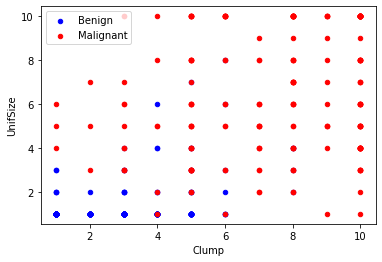

In [9]:
axes = benign_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize',color = 'blue', label = 'Benign')
malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize',color = 'red', label = 'Malignant', ax = axes)
plt.show()

**Identifying Unwanted Rows**

In [10]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [11]:
cell_df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [12]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [15]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [16]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']] # removed Id and Class
X = np.array(feature_df) # Denotes independent variable
y = np.array(cell_df['Class'])

In [17]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [18]:
X.shape, y.shape

((683, 9), (683,))

In [19]:
X[0:7], y[0:5]

(array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
        [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
        [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
        [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
        [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
        [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
        [ 1,  1,  1,  1,  2, 10,  3,  1,  1]], dtype=int64),
 array([2, 2, 2, 2, 2], dtype=int64))

### Dividing Data into Train and Testing dataset

In [20]:
# '''
# cell_df => Train(80 rows) / test (20 rows)
# Train(X,y) # 2d array
# Test(X,y) # 1d vector
# '''

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

### Modeliling (SVM with Scikit - Learn)

In [78]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2 )

In [79]:
clf.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [80]:
y_predict =  clf.predict(x_test)

In [81]:
clf.intercept_ 

array([-5.07935655])

In [82]:
clf.coef_

array([[0.29839535, 0.02814611, 0.2213195 , 0.19952873, 0.11608507,
        0.23839218, 0.16139596, 0.07811471, 0.15317052]])

### Evaluation (Results)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [85]:
import itertools
def plot_confusion_matrixSelf(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [87]:
cnf_matrix = confusion_matrix(y_test,y_predict)

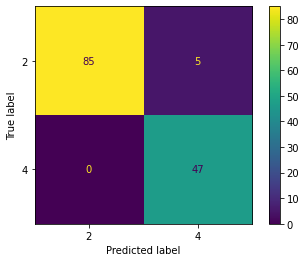

In [88]:
plot_confusion_matrix(clf, x_test, y_test) # From sklearn

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


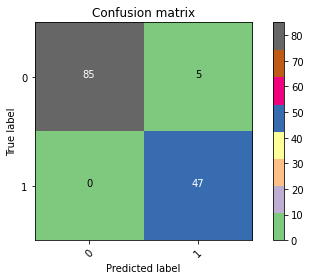

In [89]:
plot_confusion_matrixSelf(cnf_matrix,[0,1], normalize = False,cmap=plt.cm.Accent)